In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1 Linear regression

#membaca & slicing data

In [3]:
df = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Indonesia dan Jakarta')
positif_harian_jakarta = df['Positif Harian (Jakarta)'].values

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
tanggal = df['Tanggal'].values
tanggal = tanggal.reshape(-1,1)
tanggal = encoder.fit_transform(tanggal)
tanggal = tanggal.flatten()

In [4]:
#mencari index dari tanggal yang ingin dipakai
januari = df[df['Tanggal']=='1/1/2021'].index.values

ppkm_2 =  df[df['Tanggal']=='2/9/2021'].index.values

stop_train = df[df['Tanggal']=='3/28/2021'].index.values
#stop di tanggal 27

In [5]:
#dari maret 01 2020
tanggal_01 = tanggal[:stop_train[0]]
positif_harian_jakarta_01 = positif_harian_jakarta[:stop_train[0]]

In [6]:
#dari januari 01 2021
tanggal_02 = tanggal[januari[0]:stop_train[0]]
tanggal_02 = tanggal_02 % tanggal_02[0]
positif_harian_jakarta_02 = positif_harian_jakarta[januari[0]:stop_train[0]]

In [7]:
#dari febuari 09 2021
tanggal_03 = tanggal[ppkm_2[0]:stop_train[0]]
tanggal_03 = tanggal_03 % tanggal_03[0]
positif_harian_jakarta_03 = positif_harian_jakarta[ppkm_2[0]:stop_train[0]]

#Linear regression 1 maret 20 train

Intercept when fit_intercept=True : -354.05597
Intercept when fit_intercept=False : 0.00000
Coef when fit_intercept=True :  [6.74633252]
Coef when fit_intercept=False :  [5.38979625]


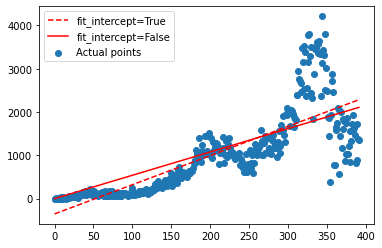

false mse =  333559.02148270997
True mse =  302100.04216040083


In [8]:
from sklearn.linear_model import LinearRegression
x_01 = tanggal_01.reshape(-1,1)

y_01 = positif_harian_jakarta_01

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)
lr_fi = LinearRegression()

lin_reg01_true = lr_fi_true .fit(x_01,y_01)
lin_reg01_false = lr_fi_false .fit(x_01,y_01)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))
print('Coef when fit_intercept=True : ',(lr_fi_true.coef_))
print('Coef when fit_intercept=False : ',(lr_fi_false.coef_))

lr_fi_true_yhat = np.dot(x_01, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(x_01, lr_fi_false.coef_) + lr_fi_false.intercept_
lr_false = lin_reg01_false.predict(x_01)
lr_true = lin_reg01_true.predict(x_01)

plt.scatter(x_01, y_01, label='Actual points')
plt.plot(x_01, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(x_01, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
score01 = mean_squared_error(y_01, lr_false)
score02 = mean_squared_error(y_01, lr_true)
print("false mse = ",score01)
print("True mse = ",score02)

#Linear regression 1 maret 20 test

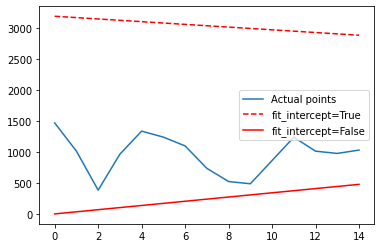

false mse =  644269.3575341281
True mse =  4423219.242394811


In [12]:
#test
x_01 = tanggal[stop_train[0]:].reshape(-1,1)
x_01 = x_01 % x_01[0]

y_01 = positif_harian_jakarta[stop_train[0]:]

false = lin_reg01_false.predict(x_01)
true = lin_reg01_true.predict(x_01)

plt.plot(x_01, y_01, label='Actual points')
plt.plot(x_01, true, 'r--', label='fit_intercept=True')
plt.plot(x_01, false, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

score01 = mean_squared_error(y_01, false)
score02 = mean_squared_error(y_01, true)
print("false mse = ",score01)
print("True mse = ",score02)

#Linear regression 1 Januari 21 train

Intercept when fit_intercept=True : 3192.27346
Intercept when fit_intercept=False : 0.00000
Coef when fit_intercept=True :  [-21.90109911]
Coef when fit_intercept=False :  [34.10369837]


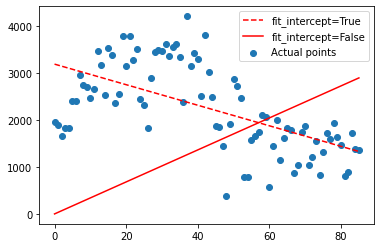

false mse =  3140864.612795414
True mse =  548516.5007495966


In [13]:
x_01 = tanggal_02.reshape(-1,1)

y_01 = positif_harian_jakarta_02

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)
lr_fi = LinearRegression()

lin_reg01_true = lr_fi_true .fit(x_01,y_01)
lin_reg01_false = lr_fi_false .fit(x_01,y_01)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))
print('Coef when fit_intercept=True : ',(lr_fi_true.coef_))
print('Coef when fit_intercept=False : ',(lr_fi_false.coef_))

lr_fi_true_yhat = np.dot(x_01, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(x_01, lr_fi_false.coef_) + lr_fi_false.intercept_
lr_false = lin_reg01_false.predict(x_01)
lr_true = lin_reg01_true.predict(x_01)

plt.scatter(x_01, y_01, label='Actual points')
plt.plot(x_01, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(x_01, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error
score01 = mean_squared_error(y_01, lr_false)
score02 = mean_squared_error(y_01, lr_true)
print("false mse = ",score01)
print("True mse = ",score02)

#Linear regression 1 Januari 21 test

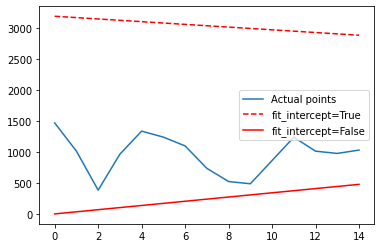

false mse =  644269.3575341281
True mse =  4423219.242394811


In [14]:
#test
x_01 = tanggal[stop_train[0]:].reshape(-1,1)
x_01 = x_01 % x_01[0]

y_01 = positif_harian_jakarta[stop_train[0]:]

false = lin_reg01_false.predict(x_01)
true = lin_reg01_true.predict(x_01)

plt.plot(x_01, y_01, label='Actual points')
plt.plot(x_01, true, 'r--', label='fit_intercept=True')
plt.plot(x_01, false, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

score01 = mean_squared_error(y_01, false)
score02 = mean_squared_error(y_01, true)
print("false mse = ",score01)
print("True mse = ",score02)

#Linear regression 9 febuari 21 train

Intercept when fit_intercept=True : 2422.98936
Intercept when fit_intercept=False : 0.00000
Coef when fit_intercept=True :  [-30.1827012]
Coef when fit_intercept=False :  [47.97824595]


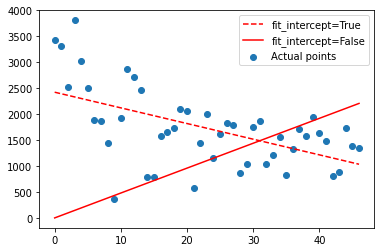

false mse =  1906449.8966233379
True mse =  391384.7490306455


In [15]:
x_01 = tanggal_03.reshape(-1,1)

y_01 = positif_harian_jakarta_03

lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)
lr_fi = LinearRegression()

lin_reg01_true = lr_fi_true .fit(x_01,y_01)
lin_reg01_false = lr_fi_false .fit(x_01,y_01)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false.intercept_))
print('Coef when fit_intercept=True : ',(lr_fi_true.coef_))
print('Coef when fit_intercept=False : ',(lr_fi_false.coef_))

lr_fi_true_yhat = np.dot(x_01, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(x_01, lr_fi_false.coef_) + lr_fi_false.intercept_
lr_false = lin_reg01_false.predict(x_01)
lr_true = lin_reg01_true.predict(x_01)

plt.scatter(x_01, y_01, label='Actual points')
plt.plot(x_01, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(x_01, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

score01 = mean_squared_error(y_01, lr_false)
score02 = mean_squared_error(y_01, lr_true)
print("false mse = ",score01)
print("True mse = ",score02)

#Linear regression 9 febuari 21 test

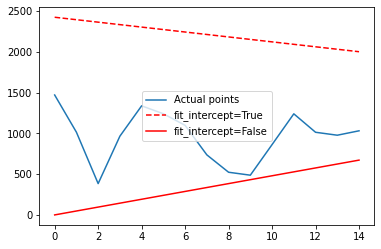

false mse =  539904.2461452134
True mse =  1670477.2854023012


In [16]:
#test
x_01 = tanggal[stop_train[0]:].reshape(-1,1)
x_01 = x_01 % x_01[0]

y_01 = positif_harian_jakarta[stop_train[0]:]

false = lin_reg01_false.predict(x_01)
true = lin_reg01_true.predict(x_01)

plt.plot(x_01, y_01, label='Actual points')
plt.plot(x_01, true, 'r--', label='fit_intercept=True')
plt.plot(x_01, false, 'r-', label='fit_intercept=False')
plt.legend()
plt.show()

score01 = mean_squared_error(y_01, false)
score02 = mean_squared_error(y_01, true)
print("false mse = ",score01)
print("True mse = ",score02)

Dapat dilihat bahwa model linear regression dengan data yang dimulai dari tanggal 9 febuari 2021 merupakan model yang lebih baik dibandingkan 2 model lainnya. walaupun bisa dilihat bahwa secara garis besar (termasuk train dan test) model *true* yang dimulai dari tanggal 1 maret 2020 paling bagus, akan tetapi keakuratan testnya masih kalah dengan model (*false*)  dari tanggal 9 febuari 2021. Garis *predict* dapat ditulis sebagai y = mx + b dimana m merupakan coefisien dan b merupakan intercept, dapat dilihat bahwa nilai m mempengaruhi arah grafik tersebut, jika m negatif maka grafiknya akan turun ke bawah, begitu juga sebaliknya jika m positif maka grafiknya akan naik ke atas. nilai b juga berpengaruh besar terhadap titik mulai dari grafik tersebut, misalkan jika nilai b = 39 maka grafik akan dimulai dari titik (0,39).

#2 Cari korelasi & scatter plot matriks

# Data Tes Harian, Positive Harian, dan Positivity Harian & Positif Harian (Jakarta) (train)

In [17]:
#train
df02 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag', header=1 )

tanggal_5mar =  df02[df02['Tgl']=='3/5/2021'].index.values

stop_tanggal01 = df02[df02['Tgl']=='4/5/2021'].index.values

tes_harian = (df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
tes_harian.index = tes_harian.index % tanggal_5mar[0] 

Positif_Harian02 = (df02['Positif  Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
Positif_Harian02.index = Positif_Harian02.index % tanggal_5mar[0] 

Positif_rate_harian= (df02['Positivity Rate Harian'].replace('#DIV/0!',0))[tanggal_5mar[0]:stop_tanggal01[0]+1]
Positif_rate_harian.index = Positif_rate_harian.index % tanggal_5mar[0] 

tanggal_5mar02 = df[df['Tanggal']=='3/5/2021'].index.values
stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values



positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %tanggal_5mar02[0]

df2 = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian})

df2.corr()



,Positif Harian (Jakarta),tes harian,Positif harian,positif rate harian
Positif Harian (Jakarta),1.000000,-0.156879,0.135881,0.588750
tes harian,-0.156879,1.000000,0.870491,-0.315352
Positif harian,0.135881,0.870491,1.000000,0.162124
positif rate harian,0.588750,-0.315352,0.162124,1.000000


#  nilai korelasi dengan gambar

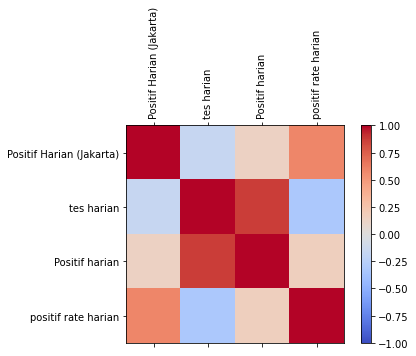

In [18]:
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

#scatter plot matriks

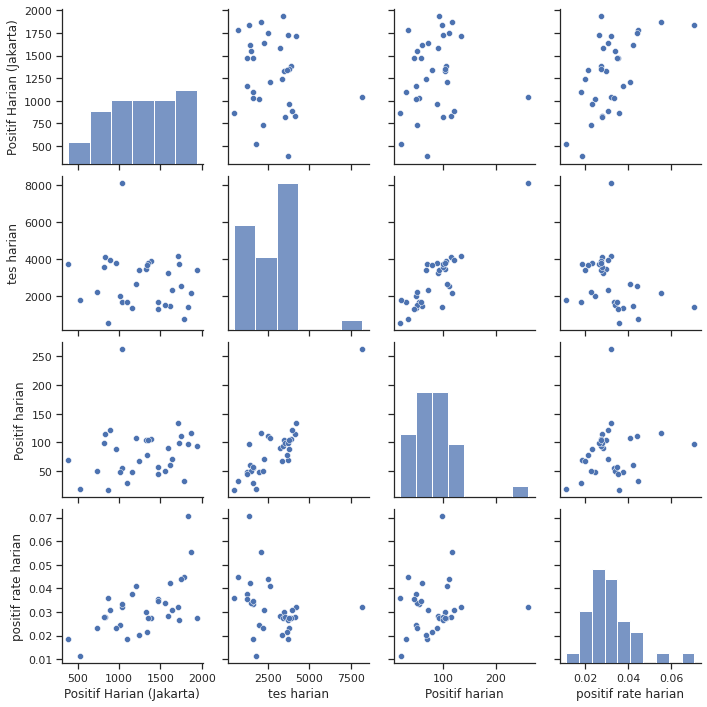

In [19]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df2)

# Data Tes Harian, Positive Harian, dan Positivity Harian & Positif Harian (Jakarta) (test)

In [20]:
#test
df02 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag', header=1 )

tanggal_5mar =  df02[df02['Tgl']=='3/5/2021'].index.values

stop_tanggal01 = df02[df02['Tgl']=='4/5/2021'].index.values

tes_harian = (df02['Tes Harian'])[stop_tanggal01[0]+1:]
tes_harian.index = tes_harian.index % (stop_tanggal01[0]+1)

Positif_Harian02 = (df02['Positif  Harian'])[stop_tanggal01[0]+1:]
Positif_Harian02.index = Positif_Harian02.index % (stop_tanggal01[0]+1)

Positif_rate_harian= (df02['Positivity Rate Harian'].replace('#DIV/0!',0))[stop_tanggal01[0]+1:]
Positif_rate_harian.index = Positif_rate_harian.index % (stop_tanggal01[0]+1)

stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values



positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %(stop_tanggal02[0]+1)

df2 = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian})
df2.corr()

,Positif Harian (Jakarta),tes harian,Positif harian,positif rate harian
Positif Harian (Jakarta),1.000000,-0.145727,0.305911,0.600675
tes harian,-0.145727,1.000000,0.828541,-0.672725
Positif harian,0.305911,0.828541,1.000000,-0.153288
positif rate harian,0.600675,-0.672725,-0.153288,1.000000


#  nilai korelasi dengan gambar

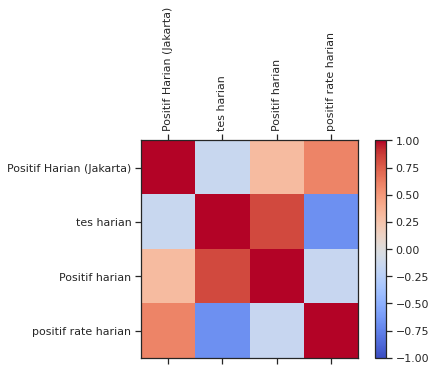

In [21]:
corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

#scatter plot matriks

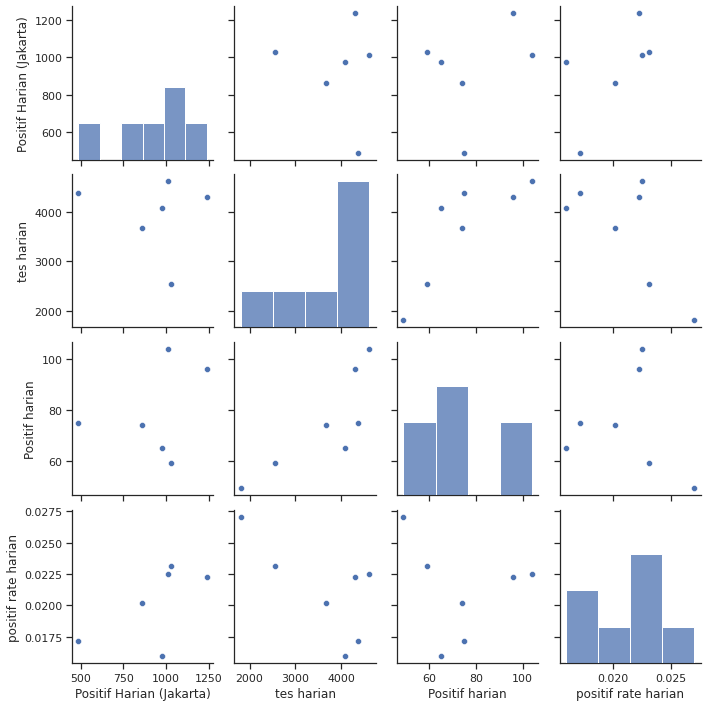

In [22]:
sns.set_theme(style="ticks")

sns.pairplot(df2)

Berdasarkan hasil scatter plot matriks dan nilai korelasi terhadap Positif Harian (Jakarta) yang sudah dilakukan, ditemukan bahwa variabel tes harian merupakan variabel yang paling berpengaruh
terhadap penekanan laju pertambahan Positif Harian (Jakarta)

#Data Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 & Positif Harian (Jakarta) (train)

In [23]:
#train
df03 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi', header=4)

tanggal_5april= 32

tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[:tanggal_5april]
tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[:tanggal_5april]
tenaga_presentase_1 = (df03['Persentase 1'])[:tanggal_5april]
tenaga_presentase_2 = (df03['Persentase 2'])[:tanggal_5april]

Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[:tanggal_5april]
Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[:tanggal_5april]
Lansia_presentase_1 = (df03['Persentase 1.1'])[:tanggal_5april]
Lansia_presentase_2 = (df03['Persentase 2.1'])[:tanggal_5april]

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[:tanggal_5april]
pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[:tanggal_5april]
pelayan_presentase_1 = (df03['Persentase 1.2'])[:tanggal_5april]
pelayan_presentase_2 = (df03['Persentase 2.2'])[:tanggal_5april]

total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[:tanggal_5april]
total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[:tanggal_5april]
total_presentase_1 = (df03['Persentase 1.3'])[:tanggal_5april]
total_presentase_2 = (df03['Persentase 2.3'])[:tanggal_5april]

positif_harian_jakarta_04 =  (df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]
positif_harian_jakarta_04.index = positif_harian_jakarta_04.index %tanggal_5mar02[0]

df3 = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_04,
                    "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2
                    })


df3.corr()


,Positif Harian (Jakarta),Tenaga vaksinasi 1,Tenaga vaksinasi 2,Tenaga presentase 1,Tenaga presentase 2,Lansia vaksinasi 1,Lansia vaksinasi 2,Lansia presentase 1,Lansia presentase 2,Pelayan vaksinasi 1,Pelayan vaksinasi 2,pelayan presentase 1,pelayan presentase 2,Total vaksinasi 1,Total vaksinasi 2,Total presentase 1,Total presentase 2
Positif Harian (Jakarta),1.000000,0.328659,-0.353885,0.328659,-0.353885,-0.423823,-0.512772,-0.423823,-0.512772,-0.437271,-0.464284,-0.437271,-0.464284,-0.425769,-0.477607,-0.425769,-0.477607
Tenaga vaksinasi 1,0.328659,1.000000,-0.224281,1.000000,-0.224281,-0.385786,-0.157160,-0.385786,-0.157160,-0.420066,-0.272367,-0.420066,-0.272367,-0.371370,-0.249785,-0.371370,-0.249785
Tenaga vaksinasi 2,-0.353885,-0.224281,1.000000,-0.224281,1.000000,0.971087,0.842915,0.971087,0.842915,0.959770,0.973550,0.959770,0.973550,0.972078,0.961342,0.972078,0.961342
Tenaga presentase 1,0.328659,1.000000,-0.224281,1.000000,-0.224281,-0.385786,-0.157160,-0.385786,-0.157160,-0.420066,-0.272367,-0.420066,-0.272367,-0.371370,-0.249785,-0.371370,-0.249785
Tenaga presentase 2,-0.353885,-0.224281,1.000000,-0.224281,1.000000,0.971087,0.842915,0.971087,0.842915,0.959770,0.973550,0.959770,0.973550,0.972078,0.961342,0.972078,0.961342
Lansia vaksinasi 1,-0.423823,-0.385786,0.971087,-0.385786,0.971087,1.000000,0.836223,1.000000,0.836223,0.993989,0.978616,0.993989,0.978616,0.997921,0.962619,0.997921,0.962619
Lansia vaksinasi 2,-0.512772,-0.157160,0.842915,-0.157160,0.842915,0.836223,1.000000,0.836223,1.000000,0.858266,0.918377,0.858266,0.918377,0.858148,0.947220,0.858148,0.947220
Lansia presentase 1,-0.423823,-0.385786,0.971087,-0.385786,0.971087,1.000000,0.836223,1.000000,0.836223,0.993989,0.978616,0.993989,0.978616,0.997921,0.962619,0.997921,0.962619
Lansia presentase 2,-0.512772,-0.157160,0.842915,-0.157160,0.842915,0.836223,1.000000,0.836223,1.000000,0.858266,0.918377,0.858266,0.918377,0.858148,0.947220,0.858148,0.947220
Pelayan vaksinasi 1,-0.437271,-0.420066,0.959770,-0.420066,0.959770,0.993989,0.858266,0.993989,0.858266,1.000000,0.975122,1.000000,0.975122,0.997739,0.964286,0.997739,0.964286


#nilai korelasi dengan gambar

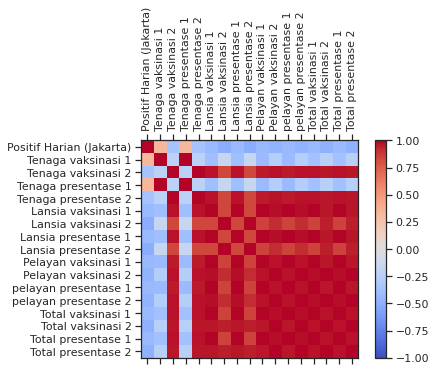

In [24]:
corr = df3.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df3.columns)
ax.set_yticklabels(df3.columns)
plt.show()

#scatter plot matriks

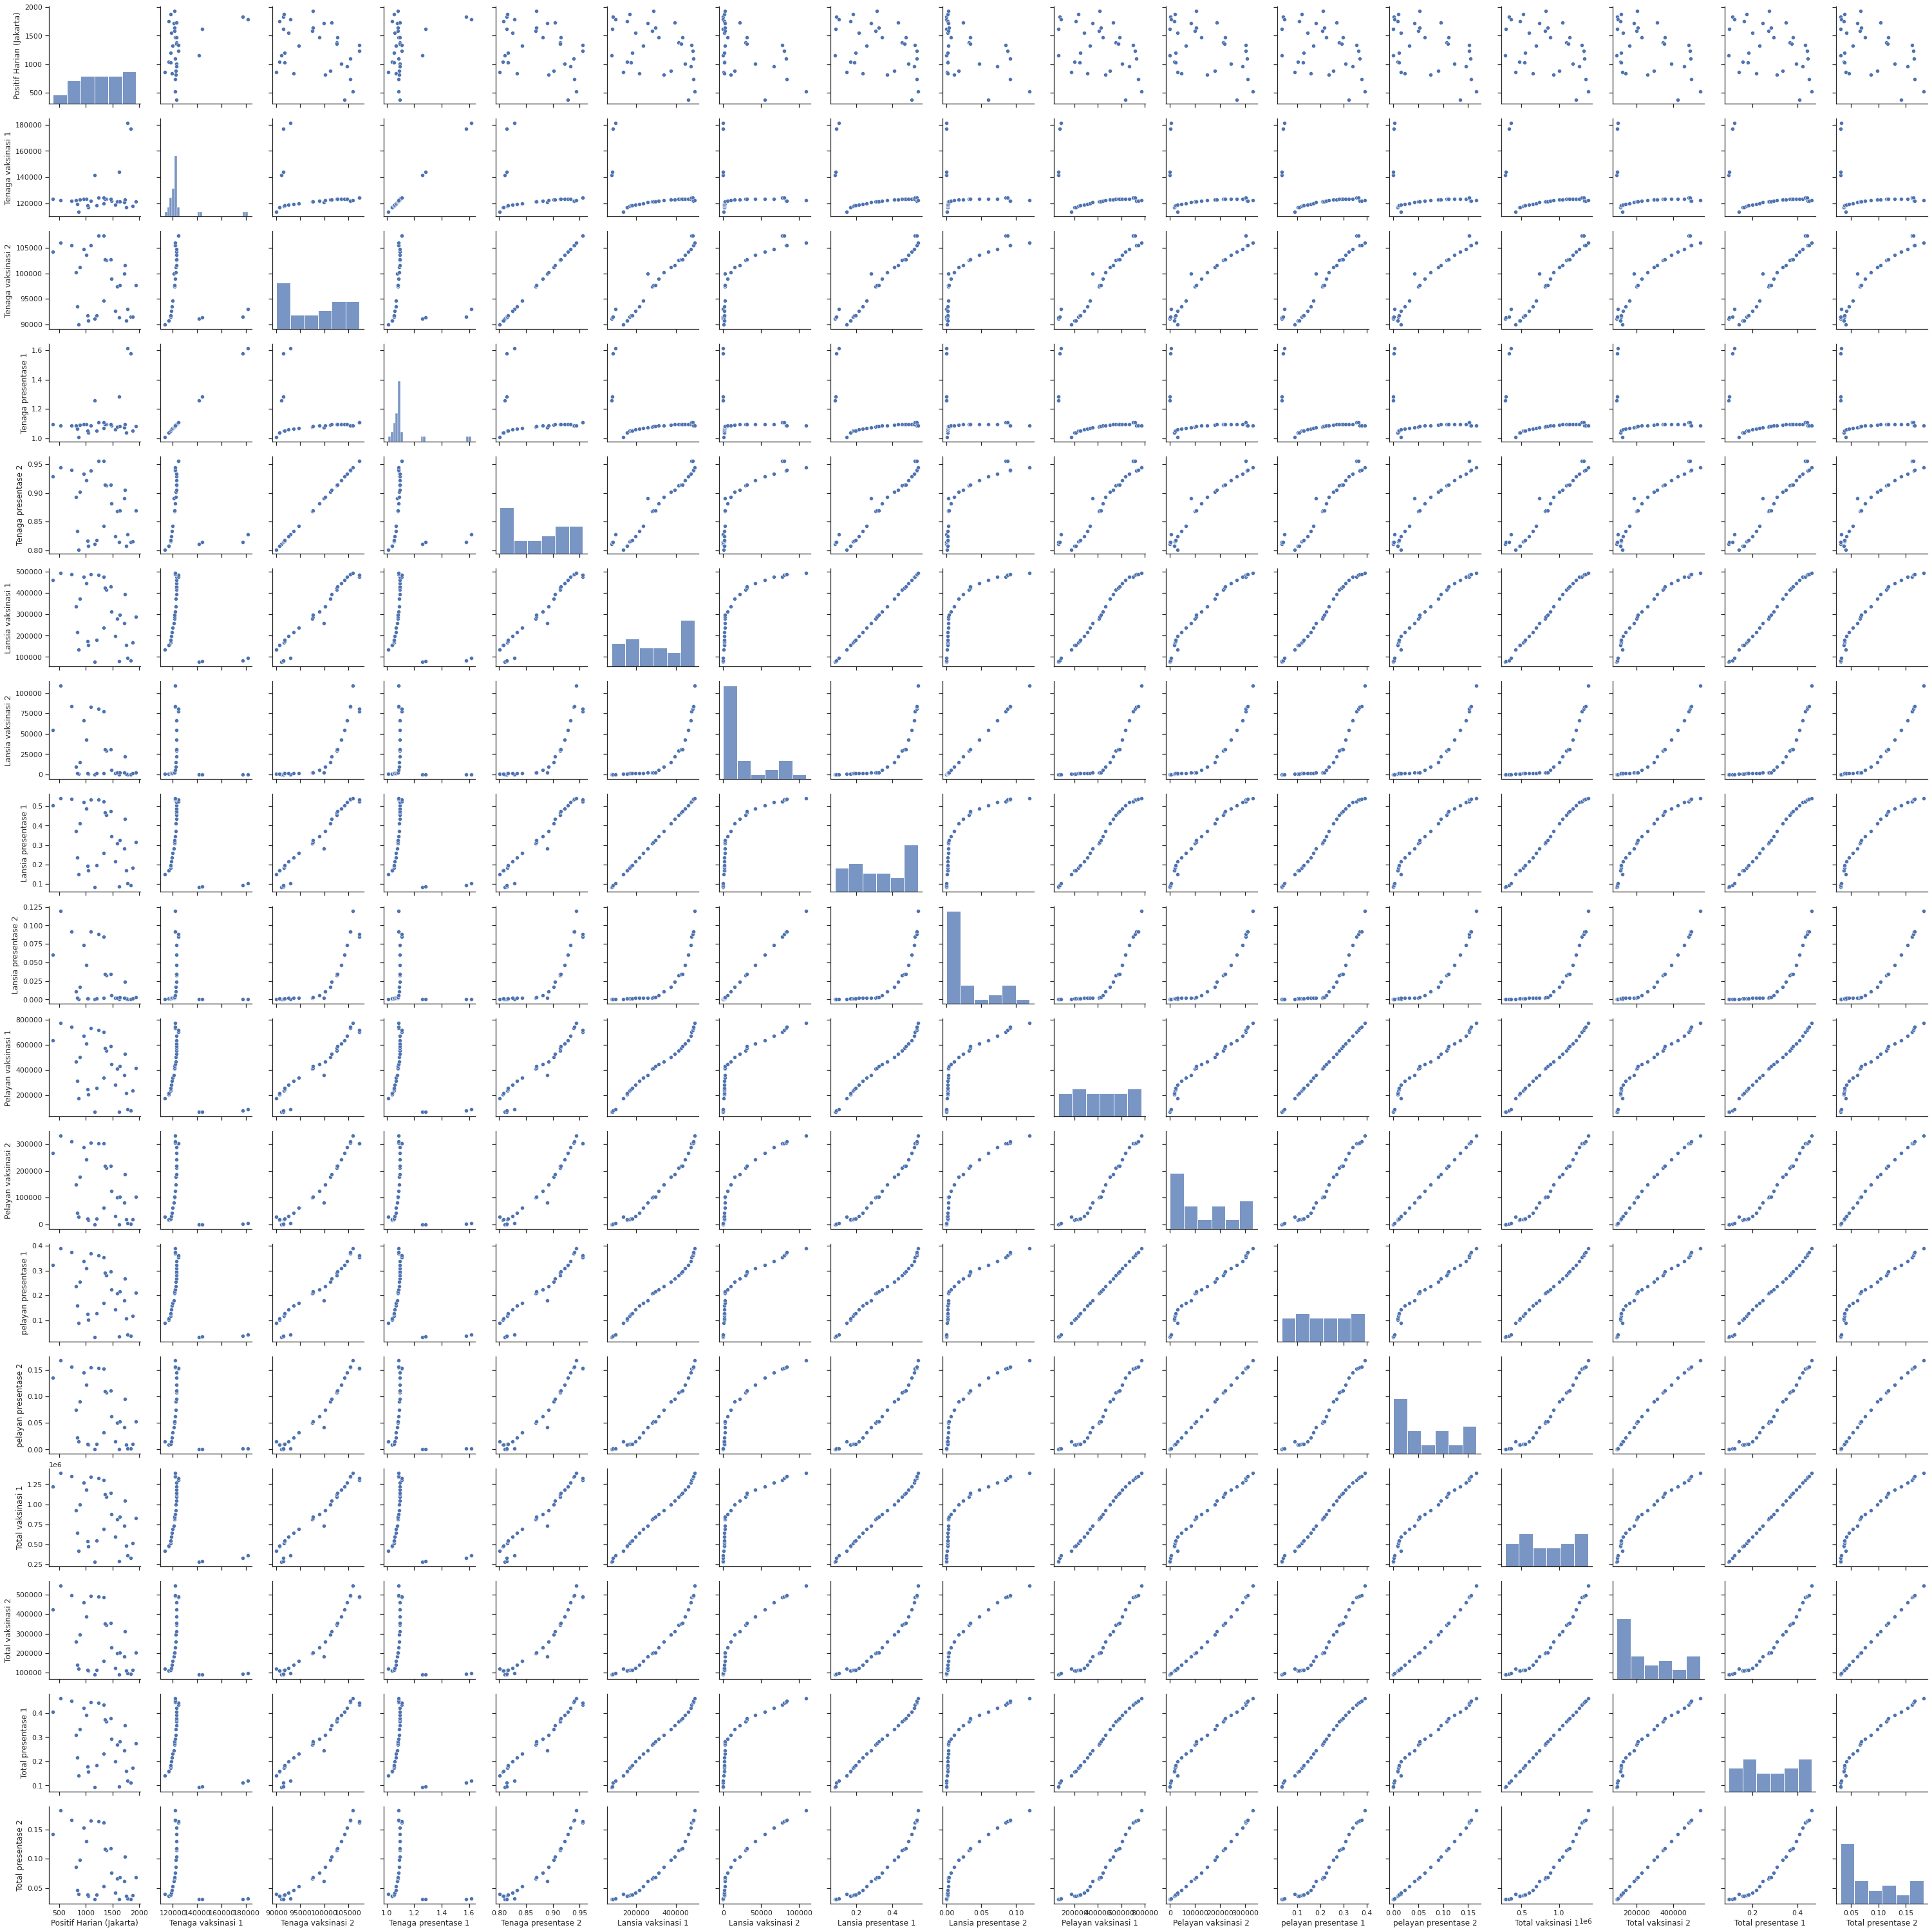

In [25]:
sns.set_theme(style="ticks")

sns.pairplot(df3)

#Data Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 & Positif Harian (Jakarta) (test)

In [26]:
#test

tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[tanggal_5april:]
tenaga_vaksinasi_1.index = tenaga_vaksinasi_1.index % tanggal_5april

tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[tanggal_5april:]
tenaga_vaksinasi_2.index = tenaga_vaksinasi_2.index % tanggal_5april

tenaga_presentase_1 = (df03['Persentase 1'])[tanggal_5april:]
tenaga_presentase_1.index=tenaga_presentase_1.index % tanggal_5april

tenaga_presentase_2 = (df03['Persentase 2'])[tanggal_5april:]
tenaga_presentase_2.index=tenaga_presentase_2.index % tanggal_5april


Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[tanggal_5april:]
Lansia_vaksinasi_1.index = Lansia_vaksinasi_1.index % tanggal_5april

Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[tanggal_5april:]
Lansia_vaksinasi_2.index = Lansia_vaksinasi_2.index % tanggal_5april

Lansia_presentase_1 = (df03['Persentase 1.1'])[tanggal_5april:]
Lansia_presentase_1.index = Lansia_presentase_1.index % tanggal_5april

Lansia_presentase_2 = (df03['Persentase 2.1'])[tanggal_5april:]
Lansia_presentase_2.index = Lansia_presentase_2.index % tanggal_5april

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[tanggal_5april:]
pelayan_vaksinasi_1.index = pelayan_vaksinasi_1.index % tanggal_5april

pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[tanggal_5april:]
pelayan_vaksinasi_2.index = pelayan_vaksinasi_2.index % tanggal_5april

pelayan_presentase_1 = (df03['Persentase 1.2'])[tanggal_5april:]
pelayan_presentase_1.index = pelayan_presentase_1.index % tanggal_5april

pelayan_presentase_2 = (df03['Persentase 2.2'])[tanggal_5april:]
pelayan_presentase_2.index = pelayan_presentase_2.index % tanggal_5april


total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[tanggal_5april:]
total_vaksinasi_1.index = total_vaksinasi_1.index % tanggal_5april

total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[tanggal_5april:]
total_vaksinasi_2.index = total_vaksinasi_2.index % tanggal_5april

total_presentase_1 = (df03['Persentase 1.3'])[tanggal_5april:]
total_presentase_1.index = total_presentase_1.index % tanggal_5april

total_presentase_2 = (df03['Persentase 2.3'])[tanggal_5april:]
total_presentase_2.index = total_presentase_2.index % tanggal_5april


positif_harian_jakarta_04 =  (df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]
positif_harian_jakarta_04.index = positif_harian_jakarta_04.index %(stop_tanggal02[0]+1)

df3 = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_04,
                    "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2
                    })

df3.corr()

,Positif Harian (Jakarta),Tenaga vaksinasi 1,Tenaga vaksinasi 2,Tenaga presentase 1,Tenaga presentase 2,Lansia vaksinasi 1,Lansia vaksinasi 2,Lansia presentase 1,Lansia presentase 2,Pelayan vaksinasi 1,Pelayan vaksinasi 2,pelayan presentase 1,pelayan presentase 2,Total vaksinasi 1,Total vaksinasi 2,Total presentase 1,Total presentase 2
Positif Harian (Jakarta),1.000000,0.715183,0.739556,0.715183,0.739556,0.559375,0.638766,0.559375,0.638766,0.675738,0.748734,0.675738,0.748734,0.648773,0.701776,0.648773,0.701776
Tenaga vaksinasi 1,0.715183,1.000000,0.995239,1.000000,0.995239,0.962599,0.969324,0.962599,0.969324,0.990579,0.990667,0.990579,0.990667,0.985857,0.984539,0.985857,0.984539
Tenaga vaksinasi 2,0.739556,0.995239,1.000000,0.995239,1.000000,0.954411,0.977801,0.954411,0.977801,0.985773,0.996233,0.985773,0.996233,0.980183,0.991448,0.980183,0.991448
Tenaga presentase 1,0.715183,1.000000,0.995239,1.000000,0.995239,0.962599,0.969324,0.962599,0.969324,0.990579,0.990667,0.990579,0.990667,0.985857,0.984539,0.985857,0.984539
Tenaga presentase 2,0.739556,0.995239,1.000000,0.995239,1.000000,0.954411,0.977801,0.954411,0.977801,0.985773,0.996233,0.985773,0.996233,0.980183,0.991448,0.980183,0.991448
Lansia vaksinasi 1,0.559375,0.962599,0.954411,0.962599,0.954411,1.000000,0.982880,1.000000,0.982880,0.988550,0.964260,0.988550,0.964260,0.993478,0.976175,0.993478,0.976175
Lansia vaksinasi 2,0.638766,0.969324,0.977801,0.969324,0.977801,0.982880,1.000000,0.982880,1.000000,0.986258,0.985696,0.986258,0.985696,0.987508,0.995734,0.987508,0.995734
Lansia presentase 1,0.559375,0.962599,0.954411,0.962599,0.954411,1.000000,0.982880,1.000000,0.982880,0.988550,0.964260,0.988550,0.964260,0.993478,0.976175,0.993478,0.976175
Lansia presentase 2,0.638766,0.969324,0.977801,0.969324,0.977801,0.982880,1.000000,0.982880,1.000000,0.986258,0.985696,0.986258,0.985696,0.987508,0.995734,0.987508,0.995734
Pelayan vaksinasi 1,0.675738,0.990579,0.985773,0.990579,0.985773,0.988550,0.986258,0.988550,0.986258,1.000000,0.990798,1.000000,0.990798,0.999308,0.992261,0.999308,0.992261


#nilai korelasi dengan gambar

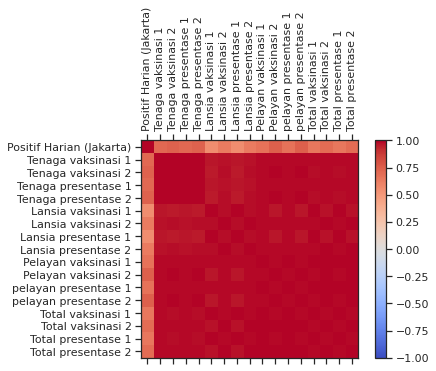

In [27]:
corr = df3.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df3.columns)
ax.set_yticklabels(df3.columns)
plt.show()

#scatter plot matriks

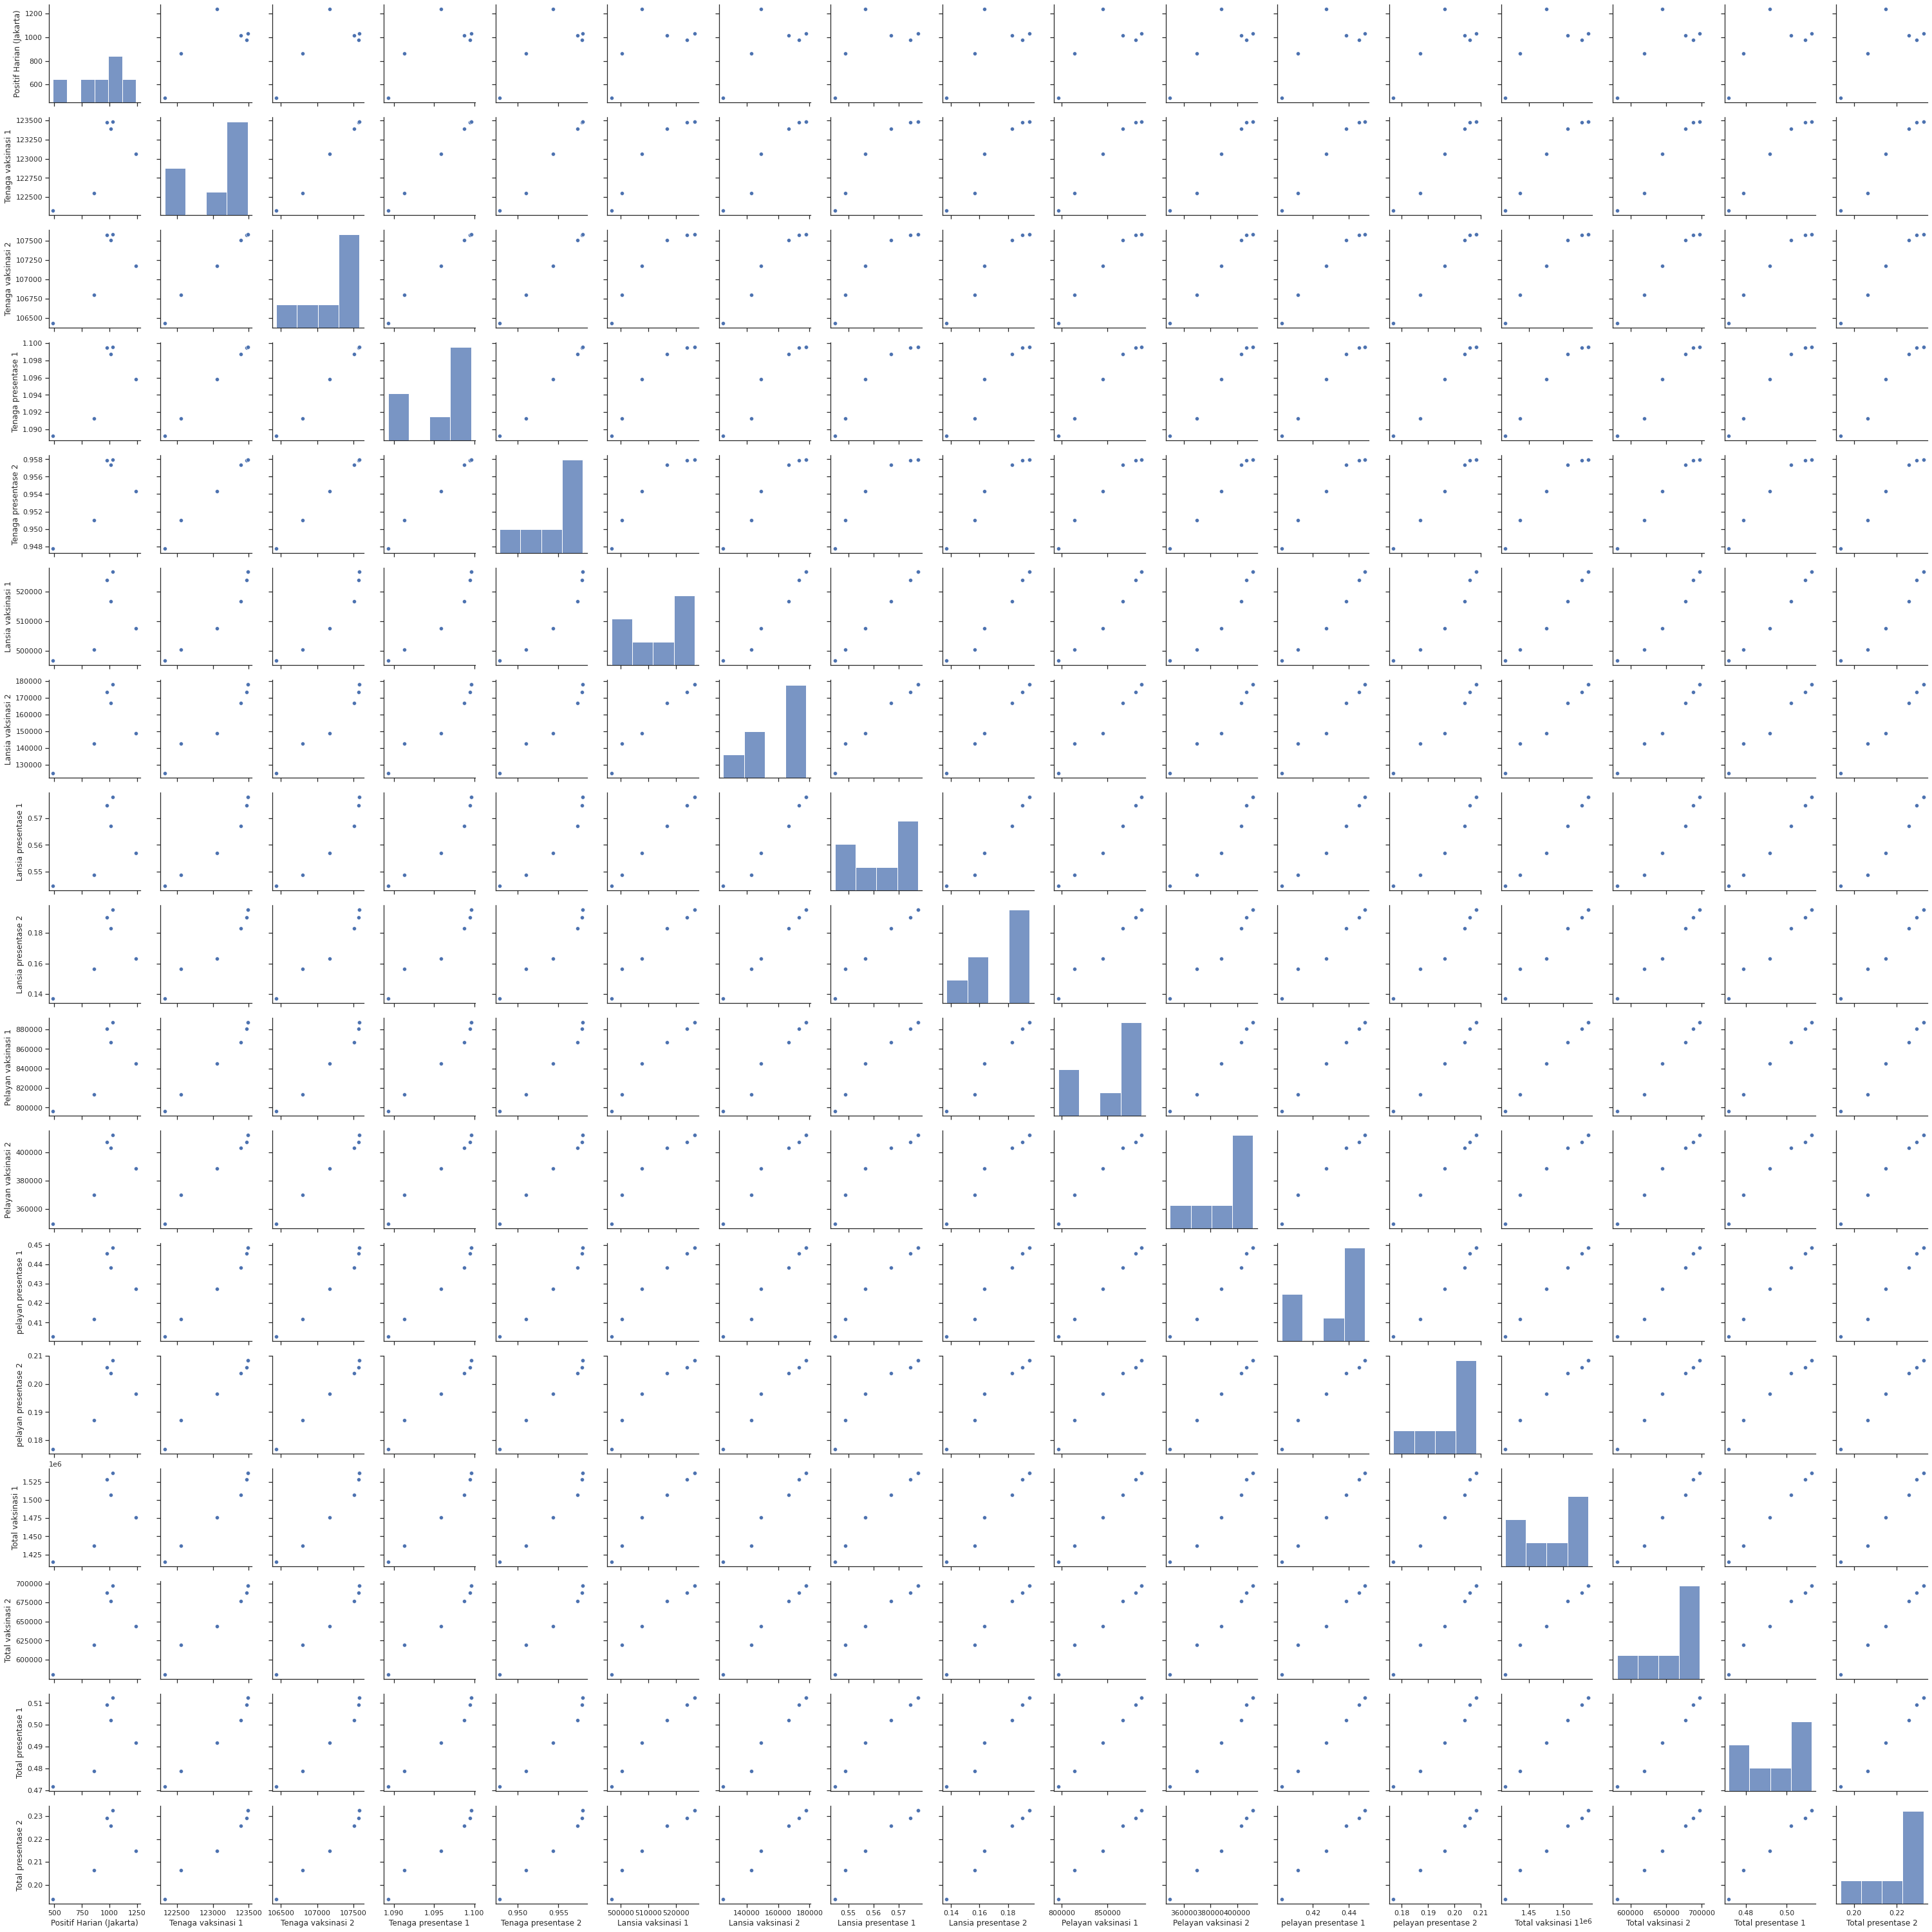

In [28]:
sns.set_theme(style="ticks")

sns.pairplot(df3)

Berdasarkan hasil scatter plot matriks dan nilai korelasi terhadap Positif Harian (Jakarta) yang sudah dilakukan, ditemukan bahwa variabel lansia vaksinasi 2 dan presentase lansia vaksinasi 2 merupakan variabel yang paling berpengaruh
terhadap penekanan laju pertambahan Positif Harian (Jakarta)

#3. Decision Tree Regressor, Gradient Boost, & Random Forest Regressor

Dengan kesimpulan yang kami dapatkan pada nomor 2, kami memutuskan untuk hanya menggunakan data tes harian dan lansia vaksinasi 2 karena 2 variabel inilah yang berperan paling besar dalam menekan angka positif harian (jakarta) menurut dari nilai korelasi yang kami dapatkan.

#3a. Decision Tree Regressor

# Data Positivity Harian & Positif Harian (Jakarta) (train)

In [29]:
from sklearn.tree import DecisionTreeRegressor

y = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

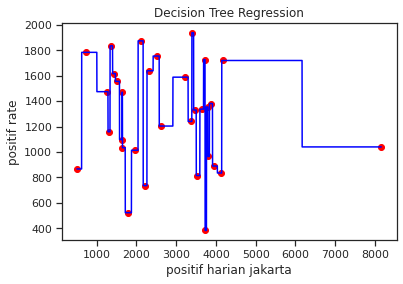

0.0


In [30]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()

from sklearn.metrics import accuracy_score
y_pred = regressor.predict(X)
score= mean_squared_error(y, y_pred)
print(score)


# Data Positivity Harian & Positif Harian (Jakarta) (test)

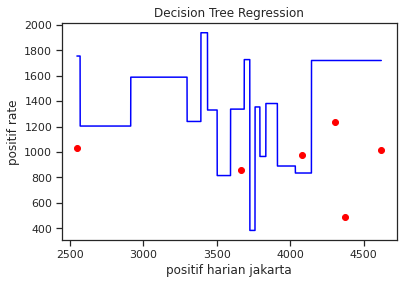

502529.6666666667


In [40]:
#test
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1,1)
# data x test sudah mencapai tanggal 12 april, sedangkan y test masih sampai tanggal 11 april, oleh karena itu slicing harus diubah ubah sesuai data yang ada



X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()


y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari Decision Tree Regressor pada data train sudah sangat akurat, dengan mse 0.0 atau tidak ada data yang tidak tepat prediksinya. Akan tetapi model ini ternyata overfitting seperti yang terlihat pada plot test dimana semua prediksinya miss, oleh karena itu kami melakukan tuning pada model agar dapat bekerja secara baik di data train ataupun test


# Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned)

In [41]:
y = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)

regressor = DecisionTreeRegressor(max_depth=3,min_samples_leaf=9,random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

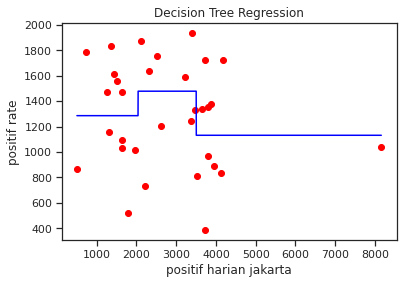

144470.72498421717


In [42]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()

y_pred = regressor.predict(X)
score= mean_squared_error(y, y_pred)
print(score)


# Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned)

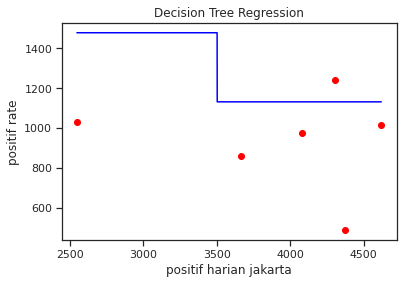

122831.91778049862


In [43]:
#test
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1, 1)


X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()

y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Walaupun setelah di tuning, keakuratan Decision Tree Regressor dalam memprediksi data train menurun drastis dari nilai mse 0.0 menjadi 144470, akan tetapi kita dapat melihat bahwa nilai mse dari data test berkurang sebanyak 4 kali lipat. oleh karena itu, kami memutuskan bahwa model ini lebih baik daripada model sebelumnya (yang tidak di tune) dalam memprediksi nilai selanjutnya.

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train)






In [44]:
y = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

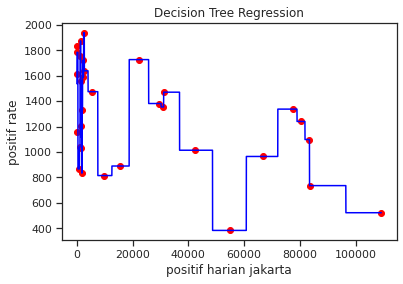

7868.208333333333


In [45]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()


y_pred = regressor.predict(X)
score= mean_squared_error(y, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test)

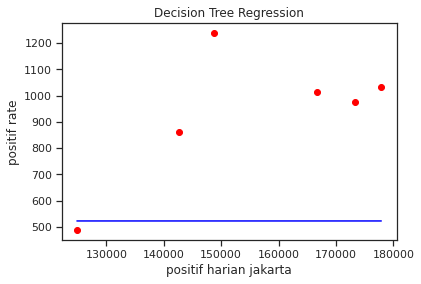

222192.16666666666


In [47]:
#test
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)


X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()

y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari Decision Tree Regressor pada data train sudah  akurat, dengan mse 7868 atau sangat kecil data yang tidak tepat prediksinya. model ini juga terlihat tidak overfitting dan menghasilkan prediksi test yang dapat dibilang cukup bagus dengan mse 222192. Akan tetapi, kami penasaran bagaimana jikalau modelnya kami tuning, apakah akan menghasilkan prediksi data yang bagus ?

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned)

In [50]:
y = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)

regressor = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5,random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

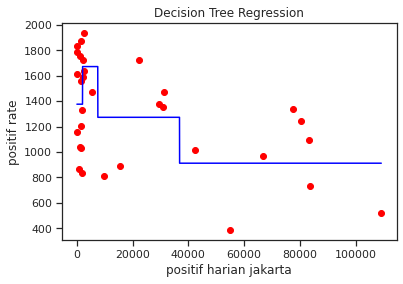

101593.68054887821


In [51]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()


y_pred = regressor.predict(X)
score= mean_squared_error(y, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test) (tuned)

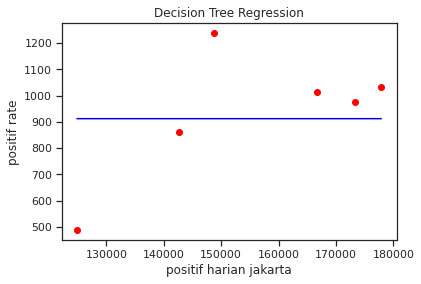

53101.140625


In [52]:
#test
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)


X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('positif harian jakarta')
plt.ylabel('positif rate')
plt.show()

y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Walaupun mse prediksi data train naik sekitar 12.9 x, kami menemukan bahwa mse prediksi data test turun sekitar 4.1x. memang jika dilihat dari prediksi data train, mse naik jauh lebih tinggi, akan tetapi pada akhirnya kita lebih melihat hasil test dibandingkan hasil pada train, oleh karena itu kami memutuskan bahwa model sesudah tune lebih bagus memprediksi hasil daripada yang belum di tune.

#3b

# Data Positivity Harian & Positif Harian (Jakarta) (train)

In [57]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [58]:

from sklearn.ensemble import GradientBoostingRegressor
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1, 1)
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

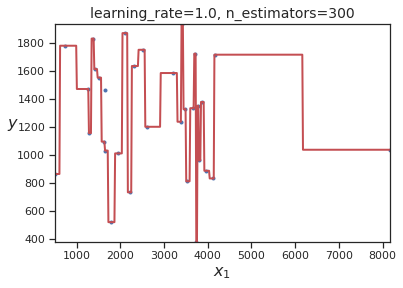

4.4428646182047385e-27


In [59]:
plot_predictions([gbrt], X_train, y_train, axes=[min(X_train), max(X_train), min(y_train), max(y_train)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data Positivity Harian & Positif Harian (Jakarta) (test)

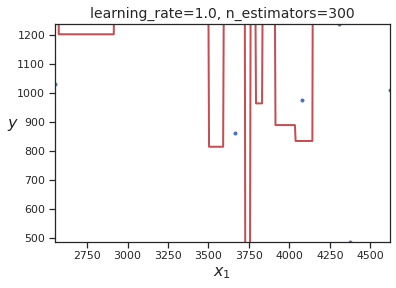

502529.6666666665


In [60]:
plot_predictions([gbrt], X_test, y_test, axes=[min(X_test), max(X_test), min(y_test), max(y_test)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari Gradient Boosting Regressor pada data train sudah sangat akurat, dengan mse sekitar 8.35048 atau hampir tidak ada data yang tidak tepat prediksinya. Akan tetapi model ini ternyata overfitting seperti yang terlihat pada plot test dimana semua prediksinya miss, oleh karena itu kami melakukan tuning pada model agar dapat bekerja secara baik di data train ataupun test

# Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned)

In [61]:

y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1, 1)
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, min_samples_leaf= 4, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

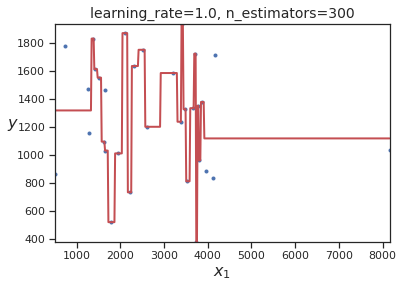

30266.710951461653


In [62]:
plot_predictions([gbrt], X_train, y_train, axes=[min(X_train), max(X_train), min(y_train), max(y_train)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned)

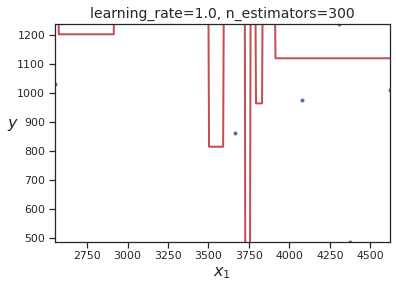

199439.5104715333


In [63]:
plot_predictions([gbrt], X_test, y_test, axes=[min(X_test), max(X_test), min(y_test), max(y_test)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Walaupun setelah di tuning, keakuratan Gradient Boosting Regressor dalam memprediksi data train menurun drastis dari nilai mse sekitar 8.3 menjadi 30266, akan tetapi kita dapat melihat bahwa nilai mse dari data test berkurang sebanyak 2.5 kali lipat. oleh karena itu, kami memutuskan bahwa model ini lebih baik daripada model sebelumnya (yang tidak di tune) dalam memprediksi nilai selanjutnya.

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train)

In [65]:
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

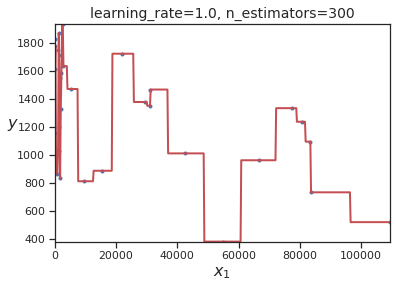

7868.208333333333


In [66]:
plot_predictions([gbrt], X_train, y_train, axes=[min(X_train), max(X_train), min(y_train), max(y_train)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test)

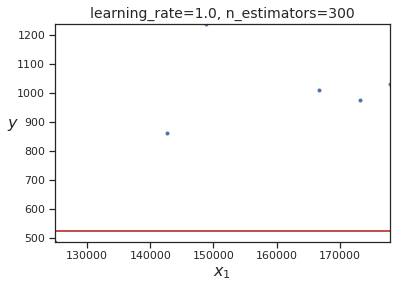

222192.16666666666


In [67]:
plot_predictions([gbrt], X_test, y_test, axes=[min(X_test), max(X_test), min(y_test), max(y_test)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari Gradient Boosting Regressor pada data train sudah sangat akurat, dengan mse 7868 atau hampir tidak ada data yang tidak tepat prediksinya. model ini juga terlihat tidak overfitting dan menghasilkan prediksi test yang dapat dibilang cukup bagus dengan mse 222192. Akan tetapi, kami penasaran bagaimana jikalau modelnya kami tuning, apakah akan menghasilkan prediksi data yang bagus ?

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned)

In [68]:

y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, min_samples_leaf= 4, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

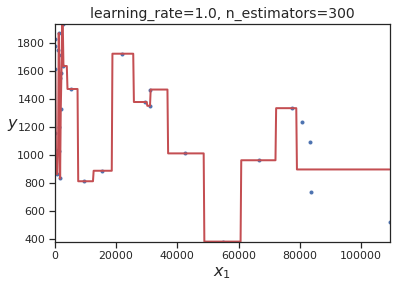

19413.835937515658


In [69]:
plot_predictions([gbrt], X_train, y_train, axes=[min(X_train), max(X_train), min(y_train), max(y_train)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test)(tuned)

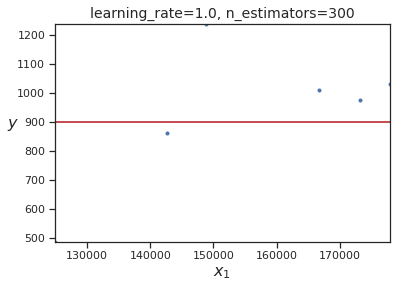

53851.64774351993


In [70]:
plot_predictions([gbrt], X_test, y_test, axes=[min(X_test), max(X_test), min(y_test), max(y_test)])
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()
y_pred = gbrt.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Walaupun mse prediksi data train naik sekitar 2.4x, kami menemukan bahwa mse prediksi data test turun sekitar 4.1x. memang jika dilihat dari prediksi data train, mse naik sedikit lebih tinggi, akan tetapi secara garis besar, kita dapat melihat bahwa model yang sudah di tune akan lebih akurat dalam memberikan hasil prediksi.

#3c

# Data Positivity Harian & Positif Harian (Jakarta) (train)

In [71]:
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1, 1)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

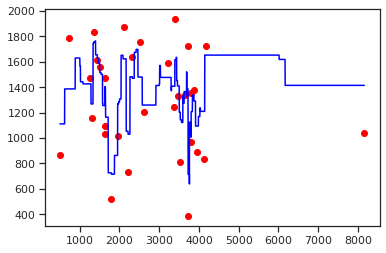

48427.080312499995


In [72]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data Positivity Harian & Positif Harian (Jakarta) (test)

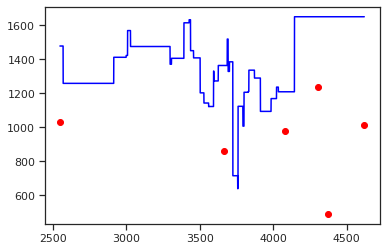

406745.7883333334


In [73]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari RandomForestRegressor pada data train sudah cukup baik, dengan mse sekitar 48427. model ini juga tidak overfitting, akan tetapi hasil prediksi test tidak bagus, yaitu dengan mse 406745, sehingga dapat dikatakan bahwa model ini tidak layak digunakan.

# Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned)

In [75]:
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df02['Tes Harian'])[stop_tanggal01[0]+1:-1]).values).reshape(-1, 1)
regressor = RandomForestRegressor(max_depth=3,min_samples_leaf=4,n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

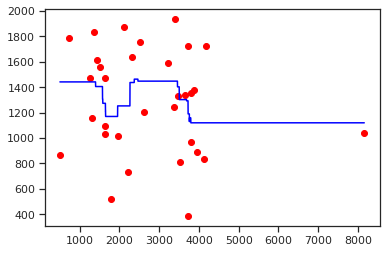

130724.71249716787


In [76]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned)

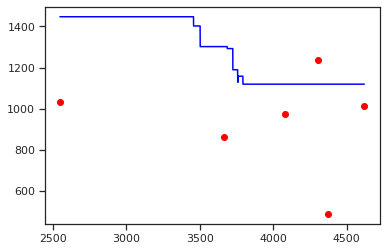

135366.4287950809


In [77]:
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari model RandomForestRegressor yang sudah di tune menghasilkan hasil prediksi yang jauh lebih baik daripada model sebelumnya, walaupun mse prediksi train naik sekitar 2.6x, akan tetapi mse prediksi test turun sebanyak 3x. karena hasil prediksi test dan secara garis besar lebih bagus, maka kami memutuskan bahwa model yang sudah di tune merupakan model yang lebih bagus.

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train)

In [78]:
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

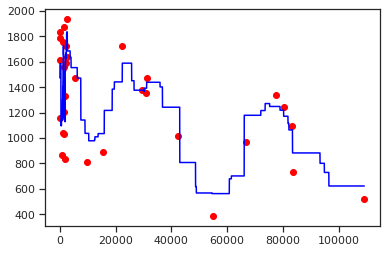

35595.820159114584


In [79]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test) 

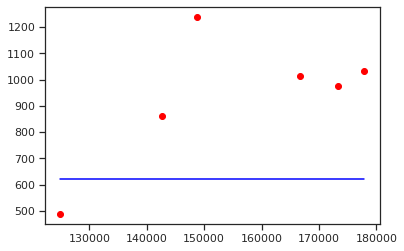

149763.1433333333


In [81]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

plt.show()
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Dapat dilihat bahwa hasil dari RandomForestRegressor pada data train sudah cukup baik, dengan mse sekitar 35595. model ini juga tidak overfitting dan memiliki mse prediksi test yang sudah baik yaitu 149763

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned)

In [82]:
y_train = (((df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]).values)
X_train = (((df03['Vaksinasi 2.1'])[:tanggal_5april]).values).reshape(-1,1)
y_test = (((df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]).values)
X_test = (((df03['Vaksinasi 2.1'])[tanggal_5april:-1]).values).reshape(-1,1)
regressor = RandomForestRegressor(max_depth=4,min_samples_leaf=4,n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

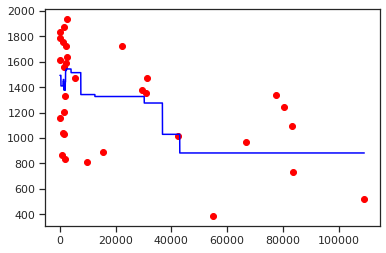

99734.3668408159


In [83]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.show()
y_pred = regressor.predict(X_train)
score = mean_squared_error(y_train, y_pred)
print(score)

# Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test) (tuned)

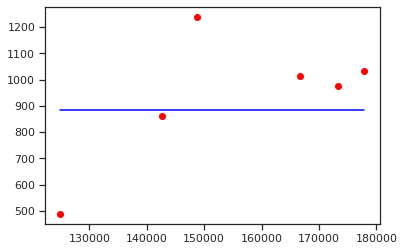

55325.10643057851


In [84]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')

plt.show()
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

Walaupun model sebelumnya sudah cukup baik, akan tetapi kami menemukan jika model ini di tune maka akan menghasilkan prediksi yang lebih baik dimana mse prediksi test adalah 55325 dibandingkan dengan model sebelumnya yang memiliki nilai mse prediksi test 149763

dapat dilihat dibawah ini merupakan nilai mse

3a
Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned):144470
Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned): 128381
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned):101593
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test) (tuned):75066

3b
Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned) 30266
Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned) 163293
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned) 19413
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (test)(tuned) 74926

3c
Data Positivity Harian & Positif Harian (Jakarta) (train) (tuned) 130724
Data Positivity Harian & Positif Harian (Jakarta) (test) (tuned) 154754
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (train) (tuned) 99734
Data vaksinasi lansia 2 & Positif Harian (Jakarta) (trained) (tuned) 75241

maka dapat disimpulkan bahwa, 
dpositif train terbaik: 3b
dpositif test terbaik: 3a
dvaksinasi train terbaik: 3b
dvaksinasi test terbaik: 3b

karena dapat dilihat bahwa mayoritas adalah 3b maka model terbaik adalah model yang menggunakan gradient boost regressor

#4 PCA

#Calling Data

In [86]:
df02 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag', header=1 )

tanggal_5mar =  df02[df02['Tgl']=='3/5/2021'].index.values

stop_tanggal01 = df02[df02['Tgl']=='4/5/2021'].index.values

tes_harian = (df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
tes_harian.index = tes_harian.index % tanggal_5mar[0] 

Positif_Harian02 = (df02['Positif  Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
Positif_Harian02.index = Positif_Harian02.index % tanggal_5mar[0] 

Positif_rate_harian= (df02['Positivity Rate Harian'].replace('#DIV/0!',0))[tanggal_5mar[0]:stop_tanggal01[0]+1]
Positif_rate_harian.index = Positif_rate_harian.index % tanggal_5mar[0] 

tanggal_5mar02 = df[df['Tanggal']=='3/5/2021'].index.values
stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values



positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %tanggal_5mar02[0]

df2_train = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian})

In [87]:
df02 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag', header=1 )

tanggal_5mar =  df02[df02['Tgl']=='3/5/2021'].index.values

stop_tanggal01 = df02[df02['Tgl']=='4/5/2021'].index.values

tes_harian = (df02['Tes Harian'])[stop_tanggal01[0]+1:]
tes_harian.index = tes_harian.index % (stop_tanggal01[0]+1)

Positif_Harian02 = (df02['Positif  Harian'])[stop_tanggal01[0]+1:]
Positif_Harian02.index = Positif_Harian02.index % (stop_tanggal01[0]+1)

Positif_rate_harian= (df02['Positivity Rate Harian'].replace('#DIV/0!',0))[stop_tanggal01[0]+1:]
Positif_rate_harian.index = Positif_rate_harian.index % (stop_tanggal01[0]+1)

stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values



positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %(stop_tanggal02[0]+1)

df2_test = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian})

In [88]:
df03 = pd.read_excel ('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi', header=4)

tanggal_5april= 32

tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[:tanggal_5april]
tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[:tanggal_5april]
tenaga_presentase_1 = (df03['Persentase 1'])[:tanggal_5april]
tenaga_presentase_2 = (df03['Persentase 2'])[:tanggal_5april]

Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[:tanggal_5april]
Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[:tanggal_5april]
Lansia_presentase_1 = (df03['Persentase 1.1'])[:tanggal_5april]
Lansia_presentase_2 = (df03['Persentase 2.1'])[:tanggal_5april]

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[:tanggal_5april]
pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[:tanggal_5april]
pelayan_presentase_1 = (df03['Persentase 1.2'])[:tanggal_5april]
pelayan_presentase_2 = (df03['Persentase 2.2'])[:tanggal_5april]

total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[:tanggal_5april]
total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[:tanggal_5april]
total_presentase_1 = (df03['Persentase 1.3'])[:tanggal_5april]
total_presentase_2 = (df03['Persentase 2.3'])[:tanggal_5april]

positif_harian_jakarta_04 =  (df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]
positif_harian_jakarta_04.index = positif_harian_jakarta_04.index %tanggal_5mar02[0]

df3_train = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_04,
                    "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2
                    })

In [89]:
tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[tanggal_5april:]
tenaga_vaksinasi_1.index = tenaga_vaksinasi_1.index % tanggal_5april

tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[tanggal_5april:]
tenaga_vaksinasi_2.index = tenaga_vaksinasi_2.index % tanggal_5april

tenaga_presentase_1 = (df03['Persentase 1'])[tanggal_5april:]
tenaga_presentase_1.index=tenaga_presentase_1.index % tanggal_5april

tenaga_presentase_2 = (df03['Persentase 2'])[tanggal_5april:]
tenaga_presentase_2.index=tenaga_presentase_2.index % tanggal_5april


Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[tanggal_5april:]
Lansia_vaksinasi_1.index = Lansia_vaksinasi_1.index % tanggal_5april

Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[tanggal_5april:]
Lansia_vaksinasi_2.index = Lansia_vaksinasi_2.index % tanggal_5april

Lansia_presentase_1 = (df03['Persentase 1.1'])[tanggal_5april:]
Lansia_presentase_1.index = Lansia_presentase_1.index % tanggal_5april

Lansia_presentase_2 = (df03['Persentase 2.1'])[tanggal_5april:]
Lansia_presentase_2.index = Lansia_presentase_2.index % tanggal_5april

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[tanggal_5april:]
pelayan_vaksinasi_1.index = pelayan_vaksinasi_1.index % tanggal_5april

pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[tanggal_5april:]
pelayan_vaksinasi_2.index = pelayan_vaksinasi_2.index % tanggal_5april

pelayan_presentase_1 = (df03['Persentase 1.2'])[tanggal_5april:]
pelayan_presentase_1.index = pelayan_presentase_1.index % tanggal_5april

pelayan_presentase_2 = (df03['Persentase 2.2'])[tanggal_5april:]
pelayan_presentase_2.index = pelayan_presentase_2.index % tanggal_5april


total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[tanggal_5april:]
total_vaksinasi_1.index = total_vaksinasi_1.index % tanggal_5april

total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[tanggal_5april:]
total_vaksinasi_2.index = total_vaksinasi_2.index % tanggal_5april

total_presentase_1 = (df03['Persentase 1.3'])[tanggal_5april:]
total_presentase_1.index = total_presentase_1.index % tanggal_5april

total_presentase_2 = (df03['Persentase 2.3'])[tanggal_5april:]
total_presentase_2.index = total_presentase_2.index % tanggal_5april


positif_harian_jakarta_04 =  (df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]
positif_harian_jakarta_04.index = positif_harian_jakarta_04.index %(stop_tanggal02[0]+1)

df3_test = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_04,
                    "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2
                    })

#Data 2.1 & Positif Harian (jakarta)

#Before PCA

In [95]:
X_train = (df2_train.iloc[:,1:]).values
y_train = df2_train.iloc[:,:1].values
X_test = (df2_test.iloc[:-1,1:].values)
y_test = df2_test.iloc[:-1,:1].values

[[ 487.]
 [ 862.]
 [1239.]
 [1013.]
 [ 977.]
 [1031.]]


In [96]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

0.0


In [97]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

152985.0


#After PCA

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [99]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

117791.16666666667


#Data 2.2 & Positif Harian (jakarta)

#Before PCA

In [100]:
X_train = (df3_train.iloc[:,1:]).values
y_train = df3_train.iloc[:,:1].values
X_test = (df3_test.iloc[:-1,1:].values)
y_test = df3_test.iloc[:-1,:1].values

In [101]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

0.0


In [102]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

51426.666666666664


#After PCA

In [103]:
pca = PCA(n_components = 13 )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [104]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

178917.66666666666


#gradient boost

#Data 2.1 & Positif Harian (jakarta)

#Before PCA

In [105]:
X_train = (df2_train.iloc[:,1:]).values
y_train = df2_train.iloc[:,:1].values
X_test = (df2_test.iloc[:-1,1:].values)
y_test = df2_test.iloc[:-1,:1].values

In [106]:

from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

8.290082125458381e-08


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

225234.30461026495


#After PCA

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [109]:
regressor = regressor = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

126866.07394330279


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Data 2.2 & Positif Harian (jakarta)

#Before PCA

In [111]:
X_train = (df3_train.iloc[:,1:]).values
y_train = df3_train.iloc[:,:1].values
X_test = (df3_test.iloc[:-1,1:].values)
y_test = df3_test.iloc[:-1,:1].values

In [112]:
regressor = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

6.895132526298345e-08


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

176792.71513618075


#After PCA

In [114]:
pca = PCA(n_components = 13 )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [115]:
regressor = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

390855.2366990878


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Random Forest

#Data 2.1 & Positif Harian (jakarta)

#Before PCA

In [117]:
X_train = (df2_train.iloc[:,1:]).values
y_train = df2_train.iloc[:,:1].values
X_test = (df2_test.iloc[:-1,1:].values)
y_test = df2_test.iloc[:-1,:1].values

In [118]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

36188.631875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

70781.16333333334


#After PCA

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [121]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

45688.64500000001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#Data 2.2 & Positif Harian (jakarta)

#Before PCA

In [125]:
X_train = (df3_train.iloc[:,1:]).values
y_train = df3_train.iloc[:,:1].values
X_test = (df3_test.iloc[:-1,1:].values)
y_test = df3_test.iloc[:-1,:1].values

In [126]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_train)
score= mean_squared_error(y_train, y_pred)
print(score)

26989.765312499992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [127]:
y_pred = regressor.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print(score)

25198.115


#After PCA

In [130]:
pca = PCA(n_components = 13 )
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [129]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
score= mean_squared_error(y_test, y_pred)
print(score)

97134.60999999999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ini merupakan list nilai mse before dan after PCA :
before :

> Decision Tree Regressor: (152985.0),(51426.666666666664)


> Gradient Boost: (225234.30461026495),(176792.71513618075)


> Random Forest Regressor: (70781.16333333334),(25198.115)


after :


> Decision Tree Regressor : (117791.16666666667),(178917.66666666666)

> Gradient Boost: (126866.07394330279),(390855.2366990878)

> Random Forest Regressor: (45688.64500000001),(97134.60999999999)


dari hasil diatas dapat disimpulkan bahwa PCA sangat membantu dalam menaikan keakuratan dalam memprediksi, jika dibandingkan pada model after PCA, kita dapat menarik kesimpulan bahwa model Random Forest Regressor dengan PCA merupakan model yang lebih baik.

karena pada langkah ke 3 kami tidak menggunakan data dimensi banyak, maka kami memasukannya pada langkah ke 4 di bagian before. dapat dilihat bahwa PCA sangat membantu saat mengolah data yang bersifat high dimension sedangkan model tanpa PCA akan kesulitan dalam mengolah data yang memiliki dimensi yang tinggi (banyak).

#5 Menambahkan Kelas

In [146]:
#test
Kelas = []
Positif_rate_harian= ((df02['Positivity Rate Harian'].replace('#DIV/0!',0))[tanggal_5mar[0]:stop_tanggal01[0]+1]).values

tes_harian = (df02['Tes Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
tes_harian.index = tes_harian.index % tanggal_5mar[0] 

Positif_Harian02 = (df02['Positif  Harian'])[tanggal_5mar[0]:stop_tanggal01[0]+1]
Positif_Harian02.index = Positif_Harian02.index % tanggal_5mar[0] 


tanggal_5mar02 = df[df['Tanggal']=='3/5/2021'].index.values
stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values



positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[tanggal_5mar02[0]:stop_tanggal02[0]+1]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %tanggal_5mar02[0]

tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[:tanggal_5april]
tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[:tanggal_5april]
tenaga_presentase_1 = (df03['Persentase 1'])[:tanggal_5april]
tenaga_presentase_2 = (df03['Persentase 2'])[:tanggal_5april]

Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[:tanggal_5april]
Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[:tanggal_5april]
Lansia_presentase_1 = (df03['Persentase 1.1'])[:tanggal_5april]
Lansia_presentase_2 = (df03['Persentase 2.1'])[:tanggal_5april]

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[:tanggal_5april]
pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[:tanggal_5april]
pelayan_presentase_1 = (df03['Persentase 1.2'])[:tanggal_5april]
pelayan_presentase_2 = (df03['Persentase 2.2'])[:tanggal_5april]

total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[:tanggal_5april]
total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[:tanggal_5april]
total_presentase_1 = (df03['Persentase 1.3'])[:tanggal_5april]
total_presentase_2 = (df03['Persentase 2.3'])[:tanggal_5april]


def kelass() :
  for i in range (0,len(Positif_rate_harian)):
    if Positif_rate_harian[i] < 0.033 :
      x = 0
      Kelas.append(x)

    elif Positif_rate_harian[i] > 0.05 :
      x = 2
      Kelas.append(x)

    else :
      x = 1
      Kelas.append(x)

kelass()

df2_train = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian,
                     "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2,
                    "Kelas":Kelas})
print(df2_train)

    Positif Harian (Jakarta)  tes harian  ...  Total presentase 2  Kelas
0                       1159        1297  ...            0.030352      1
1                       1616        1425  ...            0.030453      1
2                       1834        1371  ...            0.031317      2
3                       1783         737  ...            0.032319      1
4                        867         502  ...            0.039942      1
5                       1040        8160  ...            0.036510      0
6                       1754        2526  ...            0.036558      1
7                       1873        2119  ...            0.037671      2
8                       1034        1647  ...            0.038146      1
9                       1204        2617  ...            0.038198      1
10                      1555        1513  ...            0.041347      1
11                       835        4115  ...            0.046391      0
12                      1330        3473  ...      

In [147]:
#data test
tes_harian = (df02['Tes Harian'])[stop_tanggal01[0]+1:]
tes_harian.index = tes_harian.index % (stop_tanggal01[0]+1)

Positif_Harian02 = (df02['Positif  Harian'])[stop_tanggal01[0]+1:]
Positif_Harian02.index = Positif_Harian02.index % (stop_tanggal01[0]+1)

Positif_rate_harian= ((df02['Positivity Rate Harian'].replace('#DIV/0!',0))[stop_tanggal01[0]+1:]).values

stop_tanggal02 = df[df['Tanggal']=='4/5/2021'].index.values

positif_harian_jakarta_02= (df['Positif Harian (Jakarta)'])[stop_tanggal02[0]+1:]

positif_harian_jakarta_02.index = positif_harian_jakarta_02.index %(stop_tanggal02[0]+1)

tenaga_vaksinasi_1 = (df03['Vaksinasi 1'])[tanggal_5april:]
tenaga_vaksinasi_1.index = tenaga_vaksinasi_1.index % tanggal_5april

tenaga_vaksinasi_2 = (df03['Vaksinasi 2'])[tanggal_5april:]
tenaga_vaksinasi_2.index = tenaga_vaksinasi_2.index % tanggal_5april

tenaga_presentase_1 = (df03['Persentase 1'])[tanggal_5april:]
tenaga_presentase_1.index=tenaga_presentase_1.index % tanggal_5april

tenaga_presentase_2 = (df03['Persentase 2'])[tanggal_5april:]
tenaga_presentase_2.index=tenaga_presentase_2.index % tanggal_5april


Lansia_vaksinasi_1 = (df03['Vaksinasi 1.1'])[tanggal_5april:]
Lansia_vaksinasi_1.index = Lansia_vaksinasi_1.index % tanggal_5april

Lansia_vaksinasi_2 = (df03['Vaksinasi 2.1'])[tanggal_5april:]
Lansia_vaksinasi_2.index = Lansia_vaksinasi_2.index % tanggal_5april

Lansia_presentase_1 = (df03['Persentase 1.1'])[tanggal_5april:]
Lansia_presentase_1.index = Lansia_presentase_1.index % tanggal_5april

Lansia_presentase_2 = (df03['Persentase 2.1'])[tanggal_5april:]
Lansia_presentase_2.index = Lansia_presentase_2.index % tanggal_5april

pelayan_vaksinasi_1 = (df03['Vaksinasi 1.2'])[tanggal_5april:]
pelayan_vaksinasi_1.index = pelayan_vaksinasi_1.index % tanggal_5april

pelayan_vaksinasi_2 = (df03['Vaksinasi 2.2'])[tanggal_5april:]
pelayan_vaksinasi_2.index = pelayan_vaksinasi_2.index % tanggal_5april

pelayan_presentase_1 = (df03['Persentase 1.2'])[tanggal_5april:]
pelayan_presentase_1.index = pelayan_presentase_1.index % tanggal_5april

pelayan_presentase_2 = (df03['Persentase 2.2'])[tanggal_5april:]
pelayan_presentase_2.index = pelayan_presentase_2.index % tanggal_5april


total_vaksinasi_1 = (df03['Vaksinasi 1.3'])[tanggal_5april:]
total_vaksinasi_1.index = total_vaksinasi_1.index % tanggal_5april

total_vaksinasi_2 = (df03['Vaksinasi 2.3'])[tanggal_5april:]
total_vaksinasi_2.index = total_vaksinasi_2.index % tanggal_5april

total_presentase_1 = (df03['Persentase 1.3'])[tanggal_5april:]
total_presentase_1.index = total_presentase_1.index % tanggal_5april

total_presentase_2 = (df03['Persentase 2.3'])[tanggal_5april:]
total_presentase_2.index = total_presentase_2.index % tanggal_5april

Kelas = []

kelass()

df2_test = pd.DataFrame({"Positif Harian (Jakarta)":positif_harian_jakarta_02,
                    "tes harian":tes_harian,
                    "Positif harian":Positif_Harian02,
                    "positif rate harian":Positif_rate_harian,
                    "Tenaga vaksinasi 1":tenaga_vaksinasi_1 ,
                    "Tenaga vaksinasi 2":tenaga_vaksinasi_2 ,
                    "Tenaga presentase 1":tenaga_presentase_1,
                    "Tenaga presentase 2":tenaga_presentase_2,
                    "Lansia vaksinasi 1":Lansia_vaksinasi_1 ,
                    "Lansia vaksinasi 2":Lansia_vaksinasi_2 ,
                    "Lansia presentase 1":Lansia_presentase_1,
                    "Lansia presentase 2":Lansia_presentase_2,
                    "Pelayan vaksinasi 1":pelayan_vaksinasi_1 ,
                    "Pelayan vaksinasi 2":pelayan_vaksinasi_2 ,
                    "pelayan presentase 1":pelayan_presentase_1,
                    "pelayan presentase 2":pelayan_presentase_2,
                    "Total vaksinasi 1":total_vaksinasi_1,
                    "Total vaksinasi 2":total_vaksinasi_2,
                    "Total presentase 1":total_presentase_1,
                    "Total presentase 2":total_presentase_2,
                    "Kelas":Kelas})
print(df2_test)

   Positif Harian (Jakarta)  tes harian  ...  Total presentase 2  Kelas
0                     487.0        4373  ...            0.193611      0
1                     862.0        3665  ...            0.206390      0
2                    1239.0        4306  ...            0.214716      0
3                    1013.0        4619  ...            0.225659      0
4                     977.0        4081  ...            0.229151      0
5                    1031.0        2550  ...            0.232440      0
6                       NaN        1811  ...            0.232440      0

[7 rows x 21 columns]


pada nomor 5, kami menggabungkan semua data ( data 2.1 dan data 2.2 )

#6

#Train Voting

In [139]:
X_train = df2_train.iloc[:,0:20]
y_train = df2_train.iloc[:,20:]
X_test = df2_test.iloc[:-1,0:20]
y_test = df2_test.iloc[:-1,20:]

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [141]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

#Test Voting Accuracy score

In [142]:
from sklearn.metrics import accuracy_score

log_clf.fit(X_train, y_train)
y_pred01 = log_clf.predict(X_test)
print("Logistic Regression", accuracy_score(y_test, y_pred01))

rnd_clf.fit(X_train, y_train)
y_pred02 = rnd_clf.predict(X_test)
print("Random Forest Classifer", accuracy_score(y_test, y_pred02))

svm_clf.fit(X_train, y_train)
y_pred03 = svm_clf.predict(X_test)
print("Support Vector Classifer", accuracy_score(y_test, y_pred03))

voting_clf.fit(X_train, y_train)
y_pred04 = voting_clf.predict(X_test)
print("Voting Classifiers", accuracy_score(y_test, y_pred04))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

Logistic Regression 1.0
Random Forest Classifer 1.0
Support Vector Classifer 1.0
Voting Classifiers 1.0


#AdaBoost Train

In [143]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(X_train, y_train)


y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#AdaBoost Test Accuracy score

In [144]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


Bisa dilihat bahwa tidak terdapat perbedaan terhadap nilai akurasi yang dihasilkan Voting Classifiers dan AdaBoost.
semuanya memiliki nilai akurasi yang sangat bagus yaitu 1.0 yang berarti akurat 100%. oleh karena itu, kami menyatakan bahwa kedua model sama sama bagus.